In [1]:
import os
import io
from PIL import Image as IM
from IPython.display import display,Image,clear_output
import numpy as np
from scipy.misc import toimage
from sklearn import preprocessing
import requests
from bs4 import BeautifulSoup as BS
import time

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.models import model_from_json
from keras.utils import np_utils

Using Theano backend.


In [3]:
filelist = os.listdir(os.getcwd()+'/ocrdata')

In [4]:
class captcha_recognize:
    def __init__(self):
        self.model = self.load_model()
        self.lable = ['2', '3', '4', '6', '7', '8', '9', 'A', 'C', 'D', 'E', 'F', 'G','H', 'J', 
                      'K', 'L', 'N', 'P', 'Q', 'R', 'T', 'U', 'V', 'X', 'Y', 'Z']
    def one_hot_reverse(self,onehot):
        return self.lable[np.where(onehot==1)[0][0]]
    def load_model(self):
        self.model = model_from_json(open('cnn_captcha.json').read())
        self.model.load_weights('TWSE_captcha_weights.h5')

        sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        self.model.compile(loss='categorical_crossentropy',
                      optimizer=sgd,
                      metrics=['accuracy'])
    def preprocess(self,image):
        X = []
        imgpos = [[5,45],[45,85],[85,125],[125,165],[160,200]]
        #image = IM.open('/home/ubuntu/Notebooks/captest.png')
        imgarray = np.asarray(image)
        for tid in range(5):
            X.append(imgarray[10:50,imgpos[tid][0]:imgpos[tid][1]].reshape(3,40,40))
        X = np.array(X).astype('float32')
        X /= 255
        return X
    
    def captcha_predict(self,X):
        if type(self.model)!= Sequential:
            self.load_model()
        ans = self.model.predict(X)
        captcha =''
        for i in ans:
            captcha += self.lable[i.argmax()]
        return captcha
         

In [5]:
captcha_rec = captcha_recognize()

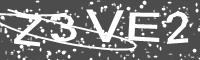

In [6]:
rs = requests.session()
r1 = rs.get('http://bsr.twse.com.tw/bshtm/bsMenu.aspx')
r1.encoding = 'utf-8'
soup = BS(r1.text)
guid = soup.findAll('img')[1].attrs['src']
VIEWSTATE = soup.select('#__VIEWSTATE')[0].attrs['value']
EVENTVALIDATION = soup.select('#__EVENTVALIDATION')[0].attrs['value']
captcha = rs.get('http://bsr.twse.com.tw/bshtm/%s'%guid, stream=True, verify=False)
captcha_byte = io.BytesIO(captcha.content)
Image(captcha_byte.getvalue(), format='jpeg')

In [7]:
PIL_image = IM.open(captcha_byte)
captcha_rec.captcha_predict(captcha_rec.preprocess(PIL_image))

'Z3VE2'

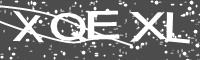

'XQEXL'

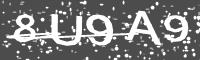

'8U9A9'

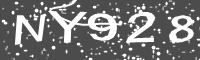

'NY928'

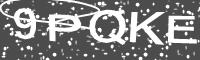

'9PQKE'

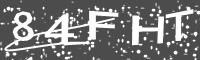

'84FHT'

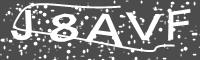

'J8AVF'

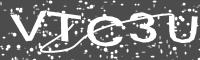

'VTC3U'

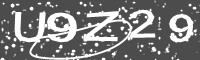

'U9Z29'

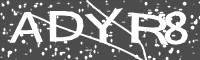

'ADYR8'

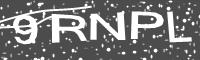

'9RNPL'

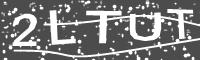

'2LTUT'

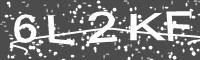

'6L2KF'

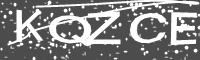

'KQZCE'

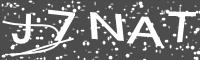

'J7NAT'

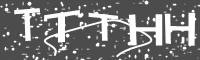

'TTTHH'

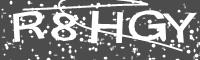

'R8HGY'

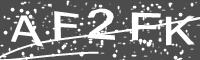

'AE2FK'

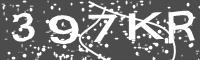

'397KR'

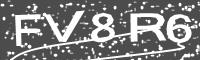

'FV8R6'

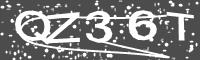

'QZ36T'

In [8]:
for i in range(20):
    rs = requests.session()
    r1 = rs.get('http://bsr.twse.com.tw/bshtm/bsMenu.aspx')
    r1.encoding = 'utf-8'
    soup = BS(r1.text)
    guid = soup.findAll('img')[1].attrs['src']
    VIEWSTATE = soup.select('#__VIEWSTATE')[0].attrs['value']
    EVENTVALIDATION = soup.select('#__EVENTVALIDATION')[0].attrs['value']
    captcha = rs.get('http://bsr.twse.com.tw/bshtm/%s'%guid, stream=True, verify=False)
    image = Image(io.BytesIO(captcha.content).getvalue(), format='jpeg')
    capt = captcha_rec.captcha_predict(captcha_rec.preprocess(IM.open(io.BytesIO(captcha.content))))
    display(image,capt)
    time.sleep(2)